먼저 datetime 모듈을 알아봅시다.

# datetime 모듈

## datetime 모듈 사용하기

datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리

datetime 라이브러리에는 
- 날짜를 처리하는 date 객체
- 시간을 처리하는 time 객체
- 날짜와 시간을 모두 처리하는 datetime 객체가 포함되어 있다.

In [1]:
from datetime import datetime

now, time 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있다.

In [4]:
now1 = datetime.now() 
print(now1)

2020-09-26 12:04:27.537783


In [5]:
now2 = datetime.today()
print(now2) 

2020-09-26 12:04:27.748197


시간을 직접 입력하여 인자로 전달하여 datetime 객체를 생성

각 변수를 출력하여 확인해보면

In [216]:
t1 = datetime.now() 
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)
type(t1)

2020-09-26 15:32:01.258393
1970-01-01 00:00:00
1970-12-12 13:24:34


datetime.datetime

입력한 시간을 바탕으로 datetime 객체가 생성된다.

datetime 객체를 사용하는 이유: 시간을 계산할 수 있다.

In [7]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

18531 days, 12:05:13.934298
<class 'datetime.timedelta'>


In [223]:
diff2 = t2 - t1

print(diff2)

-18532 days, 8:27:58.741607


## 문자열을 datetime 자료형으로 변환하기

우리가 접하는 많은 시간 데이터들은 문자형으로 저장되어 있는 경우가 많다.

하지만 문자열은 시간 계산을 할 수 없기 때문에 datetime 자료형으로 변환해 주어야 한다.

In [12]:
import pandas as pd 
import os
ebola = pd.read_csv('country_timeseries.csv')

In [13]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

ebola 데이터 프레임을 보면 Date 열이 문자열로 지정되어 있는 것을 알 수 있다.

to_datetime 메서드를 이용하면 Date 열의 자료형을 Datetime 자료형으로 변환할 수 있다.

다음과 같이 to_datetime 메서드를 사용하여 Date열의 자료형을 datetime 자료형으로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가한다.

In [217]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

date_dt 열이 datetime64 type으로 추가되었다.

시간 형식 지정자(%d, %m, %y)와 기호(/,-)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 객체를 얻을 수 있다.

In [222]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

test_df1

,order_day,date_dt1,date_dt2,date_dt3
0,01/01/15,2015-01-01,2015-01-01,2001-01-15
1,02/01/15,2015-01-02,2015-02-01,2002-01-15
2,03/01/15,2015-01-03,2015-03-01,2003-01-15


In [59]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

test_df2

,order_day,date_dt
0,01-01-15,2015-01-01
1,02-01-15,2015-01-02
2,03-01-15,2015-01-03


<시간 형식 지정자 표 추가 필요>

- strftime 메서드

now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현한다.

하지만 원하는 시계열 데이터의 시간 요소가 연도, 월, 일 뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 한다.

strftime 메서드와 시간 형식 지정자를 이용하면 시계열 데이터를 잘라낼 수 있다.

In [18]:
now = datetime.now()
print(now)

2020-09-26 12:19:05.497295


In [19]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2020-09-26


In [20]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime) 

12:19:05


In [21]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime) 

2020-09-26 12:19:05


앞에서는 to_datetime 메서드를 이용하여 문자열로 저장되어 있는 Date 열을 datetime 객체로 변환했다.

하지만 datetime 객체로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단하다.

## datetime 객체로 변환하려는 열을 지정하여 데이터 집합 불러오기

read_csv 메서드의 parse_dates 인자에 datetime 객체로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것

결과를 보면 Date 열이 문자열이 아니라 datetime 객체 라는 것을 확인할 수 있다.

In [22]:
ebola1 = pd.read_csv('country_timeseries.csv', parse_dates=['Date']) 
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## datetime 객체에서 날짜 정보 추출하기

datetime 객체에는 년,월,일과 같은 날짜 정보를 따로 저장하고 있는 속성이 이미 준비되어 있다.

datetime 객체에서 날짜 저보를 하나씩 추출해보자.

In [215]:
# 문자열로 저장된 날짜를 시리즈에 담아 datetime 객체로 변환
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series) 
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

datetime 객체(d1)의 year, month, day 속성을 이용하면 년,월,일 정보를 바로 추출할 수 있다.

In [24]:
print(d1[0].year)

2018


In [25]:
print(d1[0].month)

5


In [26]:
print(d1[0].day)

16


## dt 접근자로 시계열 데이터 정리하기

dt 접근자를 이용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다.

In [27]:
# ebola 데이터 집합을 불러온 다음 Date 열을 datetime 객체로 변환하여 새로운 열(date_df)로 추가
ebola = pd.read_csv('country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [61]:
ebola[['Date', 'date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


다음은 dt 접근자를 사용하지 않고, 인덱스가 3인 년,월,일의 데이터를 추출한 것

In [29]:
print(ebola['date_dt'][3].year)

2015


In [30]:
print(ebola['date_dt'][3].month)

1


In [31]:
print(ebola['date_dt'][3].day)

2


위 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편하다.

다음은 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값을 추출한 것

추출한 연도 값은 ebola 데이터프레임의 새로운 열(year)로 추가

In [62]:
ebola['year'] = ebola['date_dt'].dt.year
ebola[['Date', 'date_dt', 'year']].head()

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015
3,1/2/2015,2015-01-02,2015
4,12/31/2014,2014-12-31,2014


위 과정을 응용하여 월,일 데이터를 한 번에 추출해서 새로운 열(month, day)로 추가

In [63]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

ebola[['Date', 'date_dt', 'year', 'month', 'day']].head()

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


In [140]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                  122 no

date_dt 열은 datetime 객체이고 나머지는 정수형임을 알 수 있다.

# 사례별 시계열 데이터 계산하기

## 에볼라 최초 발병일 계산하기

In [64]:
# 기존 데이터가 시간 역순으로 정렬되어 있기에, 시간 순으로 데이터를 보려면 마지막부터 봐야 한다.
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


121행에서 볼 수 있듯이 에볼라가 발생하기 시작한 날은 2014년 03월 22일이다.

min 메서드를 사용하여 에볼라의 최초 발병일을 찾아보자.

In [36]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다.

In [65]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

ebola[['Date', 'Day', 'outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


## 파산한 은행의 개수 계산하기

이번에는 파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산해보자.

In [40]:
banks = pd.read_csv('banklist.csv') 
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [45]:
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


Closing Date, Update Date열의 데이터 자료형이 문자열이므로, read_csv 메서드의 parse_dates 속성을 이용하여 datetime 객체로 변환

In [46]:
banks = pd.read_csv('banklist.csv', parse_dates=[5, 6]) 
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있다.

In [48]:
# dt 접근자와 quarter 속성을 이용햐 은행이 파산한 연도, 분기를 새로운 열에 추가
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


이제 연도별로 파산한 은행이 얼마나 되는지 알아보자.

In [69]:
# group by 메서드를 사용하여 연도별로 파산한 은행의 개수 구하기
closing_year = banks.groupby(['closing_year']).size()

print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


이번에는 각 연도별, 분기별로 파산한 은행의 개수를 알아보자.

In [70]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()

print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

그래프로 그리기

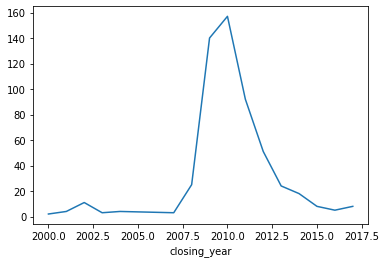

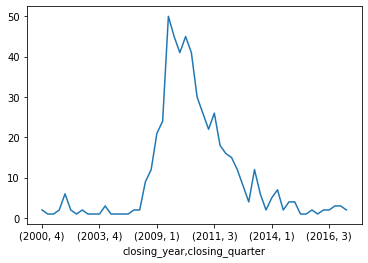

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot() 
plt.show()

fig, ax = plt.subplots() 
ax = closing_year_q.plot() 
plt.show()

## 테슬라 주식 데이터로 시간 계산하기

주가 데이터를 가져오려면 Quandl에 가입하여 API 키를 받아야하는데 다소 번거로운 과정이기에 캐글 데이터를 활용하도록 하자.

https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020

In [139]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [140]:
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB
None


In [141]:
tesla = pd.read_csv('TSLA.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB
None


In [142]:
# 2010년 6월의 데이터만 보고 싶을 때
tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100


## datetime 객체를 인덱스로 설정하여 데이터 추출하기

데이터 프레임의 행 번호를 인덱스로 사용하지 않고
datetime 객체를 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있다.

In [143]:
tesla.index = tesla['Date'] 
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)


In [162]:
tesla['2017'].iloc[:5, :5]

,Date,Open,High,Low,Close
Date,,,,,
2017-01-03,2017-01-03,214.860001,220.330002,210.960007,216.990005
2017-01-04,2017-01-04,214.750000,228.000000,214.309998,226.990005
2017-01-05,2017-01-05,226.419998,227.479996,221.949997,226.750000
2017-01-06,2017-01-06,226.929993,230.309998,225.449997,229.009995
2017-01-09,2017-01-09,228.970001,231.919998,228.000000,231.279999


In [163]:
tesla['2020-01'].iloc[:, :5]

,Date,Open,High,Low,Close
Date,,,,,
2020-01-02,2020-01-02,424.500000,430.700012,421.709991,430.260010
2020-01-03,2020-01-03,440.500000,454.000000,436.920013,443.010010
2020-01-06,2020-01-06,440.470001,451.559998,440.000000,451.540009
2020-01-07,2020-01-07,461.399994,471.630005,453.359985,469.059998
2020-01-08,2020-01-08,473.700012,498.489990,468.230011,492.140015
2020-01-09,2020-01-09,497.100006,498.799988,472.869995,481.339996
2020-01-10,2020-01-10,481.790009,484.940002,473.700012,478.149994
2020-01-13,2020-01-13,493.500000,525.630005,492.000000,524.859985
2020-01-14,2020-01-14,544.260010,547.409973,524.900024,537.919983


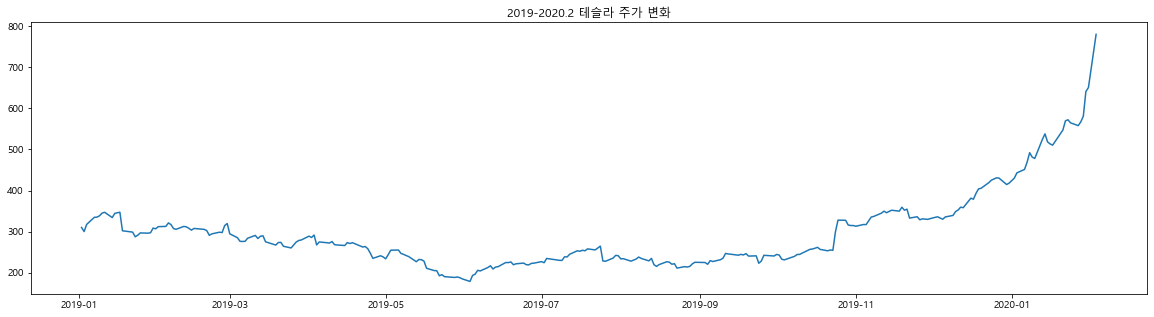

In [179]:
# 2019-2020.2 테슬라 주가 변화

tesla_2019_2020 = tesla['2019':'2020']

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

plt.rc('font', family = 'Malgun Gothic')

ax.plot(tesla_2019_2020['Date'],tesla_2019_2020['Close'])

ax. set_title('2019-2020.2 테슬라 주가 변화')

plt.show()

## 시간 간격을 인덱스로 설정하여 데이터 추출하기

주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶다면 시간 간격 인덱스로 지정하여 데이터를 추출하면 된다.

Date 열에서 Date 열의 최솟값을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있다.

In [183]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()

tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
Date,,,,,,,,
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,3500 days
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,3501 days
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,3502 days
2020-01-31,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,3503 days
2020-02-03,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,3506 days


ref_date 열을 인덱스로 지정하면 시간 간격(ref_date)을 이용하여 데이터를 추출할 수 있다.

In [184]:
tesla.index = tesla['ref_date']

tesla.iloc[:5, :4]

,Date,Open,High,Low
ref_date,,,,
0 days,2010-06-29,19.000000,25.00,17.540001
1 days,2010-06-30,25.790001,30.42,23.299999
2 days,2010-07-01,25.000000,25.92,20.270000
3 days,2010-07-02,23.000000,23.10,18.709999
7 days,2010-07-06,20.000000,20.00,15.830000


데이터를 수집한 이후 최초 7일간의 데이터

In [191]:
tesla[:'7days']

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
ref_date,,,,,,,,
0 days,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,0 days
1 days,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1 days
2 days,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2 days
3 days,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3 days
7 days,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7 days


## 시간 범위 생성하여 인덱스로 지정하기

만일 특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보려면 어떻게 해야 할까?

In [202]:
# 다시 에볼라 데이터를 가져와봅시다.
ebola = pd.read_csv('country_timeseries.csv', parse_dates=[0]) 
ebola.iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0
...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN


2015년 01월 01일과 2014년 03월 23일 등의 데이터가 누락되었음을 발견할 수 있다.

date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 01월 05일 사이의 시간 인덱스 생성

In [210]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05') 
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어진다.

DatetimeIndex에는 freq 속성이 포함되어 있는데 freq 속성을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있다.

디폴트 값은 freq='D' (달력 일자 단위)

In [211]:
# head_range는 ebola 데이터의 시간 순서와 반대로 되어 있다. 이를 바꿔준다.
head_range = reversed(head_range)

In [212]:
ebola_5 = ebola.head() # 앞쪽 5개 데이터만 추출해서 새로운 데이터 프레임을 만들어보자.

ebola_5.index = ebola_5['Date'] # Date 열을 인덱스로 먼저 지정하지 않으면 오류가 발생한다.
ebola_5 = ebola_5.reindex(head_range)     # 반드시 Date 열을 인덱스로 지정한 다음에 시간 범위를 인덱스로 지정해야 한다.
ebola_5

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


## 시간 범위의 주기 설정하기

freq 인수로 특정한 날짜만 생성되도록 할 수도 있다. 많이 사용되는 freq 인수값은 다음과 같다.

- s: 초
- T: 분
- H: 시간
- D: 일(day)
- B: 주말이 아닌 평일
- W: 주(일요일)
- W-MON: 주(월요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날

In [200]:
print(pd.date_range('2017-01-01', '2017-01-07', freq='B')) # 평일만 포함

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/